In [1]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Input/ViajesComunas_std.csv')

In [3]:
df.head(2)

,Fecha,Origen,Destino,Viajes
0,2020-03-01,Cerrillos,Cerrillos,2026
1,2020-03-01,Cerrillos,Cerro Navia,31


In [4]:
#df=df[(df.Fecha>='2020-01-01') & (df.Fecha<'2020-06-01')]
df=df.dropna()

In [5]:
df = df[(df.Origen != '(En Blanco)') & (df.Destino != '(En Blanco)')]

In [6]:
excluir = ['Isla de Maipo','San José de Maipo','Alhué','San Pedro','Pirque','Paine','Melipilla','Tiltil','Colina','Lampa',
           'Curacaví','María Pinto','Buin','Lo Barnechea','El Monte','Talagante']
df_comunas = df[(~df['Destino'].isin(excluir)) & (~df['Origen'].isin(excluir)) ]

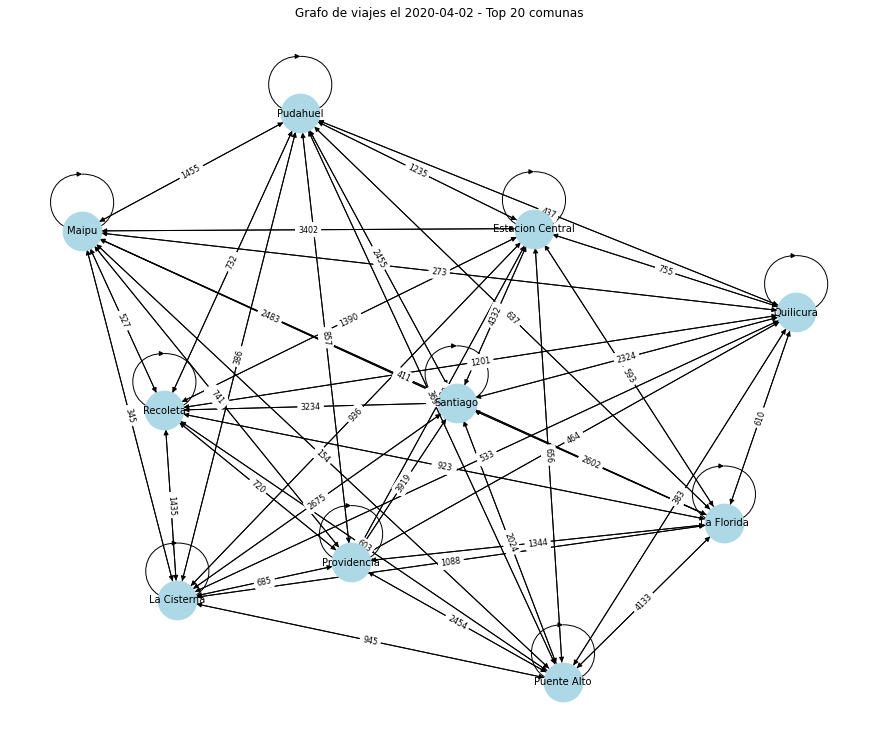

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


# Filtrar el DataFrame por la fecha deseada
fecha_deseada = "2020-04-02"
df_fecha = df[df["Fecha"] == fecha_deseada]

# Calcular la cantidad total de viajes para cada comuna
total_viajes_por_comuna = df_fecha.groupby('Origen')['Viajes'].sum()

# Seleccionar las 20 comunas con mayor cantidad de viajes
top_comunas = total_viajes_por_comuna.nlargest(10).index.tolist()

# Filtrar el DataFrame para mantener solo las filas con las comunas seleccionadas
df_top_comunas = df_fecha[df_fecha['Origen'].isin(top_comunas) & df_fecha['Destino'].isin(top_comunas)]

# Crear un grafo dirigido solo con las comunas seleccionadas
G = nx.DiGraph()

# Agregar nodos y aristas al grafo
for _, row in df_top_comunas.iterrows():
    origen = row["Origen"]
    destino = row["Destino"]
    viajes = row["Viajes"]
    
    G.add_edge(origen, destino, weight=viajes)

# Obtener las posiciones de los nodos para la visualización
pos = nx.spring_layout(G, seed=42)

# Obtener los pesos de las aristas para las etiquetas
edge_labels = nx.get_edge_attributes(G, "weight")

# Ajustar el tamaño del gráfico y mostrar la visualización
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="lightblue", font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title(f"Grafo de viajes el {fecha_deseada} - Top 20 comunas")
plt.show(block=True)

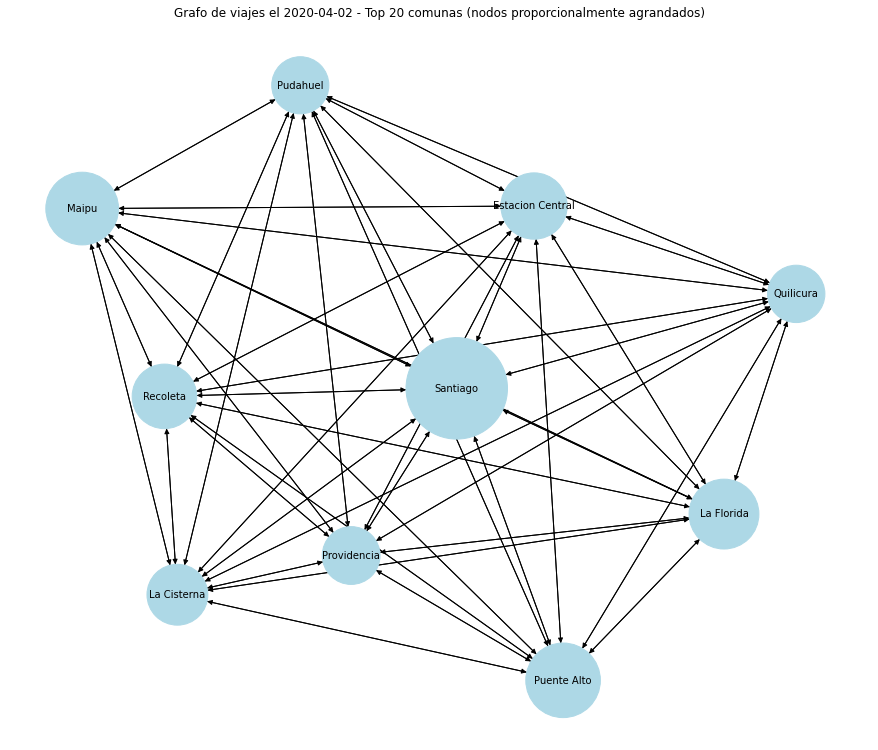

In [8]:
# Calcular la cantidad total de viajes para cada comuna
total_viajes_por_comuna = df_fecha.groupby('Origen')['Viajes'].sum()

# Seleccionar las 20 comunas con mayor cantidad de viajes
top_comunas = total_viajes_por_comuna.nlargest(10).index.tolist()

# Filtrar el DataFrame para mantener solo las filas con las comunas seleccionadas
df_top_comunas = df_fecha[df_fecha['Origen'].isin(top_comunas) & df_fecha['Destino'].isin(top_comunas)]

# Filtrar el DataFrame para mantener solo las filas con las comunas seleccionadas y diferentes origen y destino
df_top_comunas = df_fecha[
    (df_fecha['Origen'].isin(top_comunas) & df_fecha['Destino'].isin(top_comunas)) &
    (df_fecha['Origen'] != df_fecha['Destino'])
]

# Crear un grafo dirigido solo con las comunas seleccionadas
G = nx.DiGraph()

# Agregar nodos y aristas al grafo
for _, row in df_top_comunas.iterrows():
    origen = row["Origen"]
    destino = row["Destino"]
    viajes = row["Viajes"]
    
    G.add_edge(origen, destino, weight=viajes)

# Obtener las posiciones de los nodos para la visualización
pos = nx.spring_layout(G, seed=42)

# Calcular los tamaños de los nodos de manera proporcional
total_viajes_min = min(total_viajes_por_comuna)
total_viajes_max = max(total_viajes_por_comuna)
node_sizes = [(total_viajes_por_comuna[comuna] - total_viajes_min) / (total_viajes_max - total_viajes_min) * 10000 + 300
              for comuna in G.nodes]

# Ajustar el tamaño del gráfico y mostrar la visualización
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color="lightblue", font_size=10)
plt.title(f"Grafo de viajes el {fecha_deseada} - Top 20 comunas (nodos proporcionalmente agrandados)")
plt.show(block=True)
